# Sensors data visual report using FFT

In [1]:
import matplotlib.pyplot as plt
import time
from scipy.fftpack import fft
from scipy import signal
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from numpy import fft as npfft
import pylab as pl

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
df=pd.read_csv('data_zero.csv')
# ---------------
speed = 100
# ---------------


### FFT - Fourier Transforms

In [3]:
def FFT_chart(df):  
    columns = df.columns
    for column in columns:
        if column != df.columns[0]:
            x=df[str(column)]
            x=x.to_numpy()
            t=df[df.columns[0]]
            N = np.int(np.prod(t.shape))
            Fs = 1/(t[1]-t[0])
            T = 1/Fs
            #   FFT-----------------------------------------------------------
            plt.figure(figsize=(14,5))
            xf = np.linspace(0.0, 100.0/(2.0*T), N//2)
            yf = fft(x)
            plt.plot(xf, 2.0/N * np.abs(yf[0:np.int(N/2)]),color='c')
            plt.grid()
            plt.ylim( (0, 0.01) )
            plt.title('Frequency sensor ' + str(column),size=16)
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Amplitud')

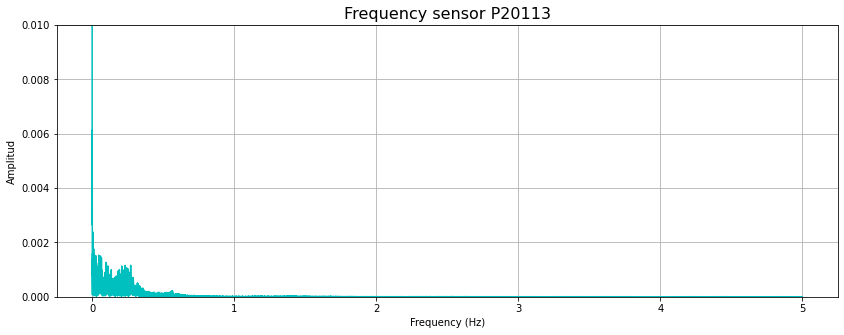

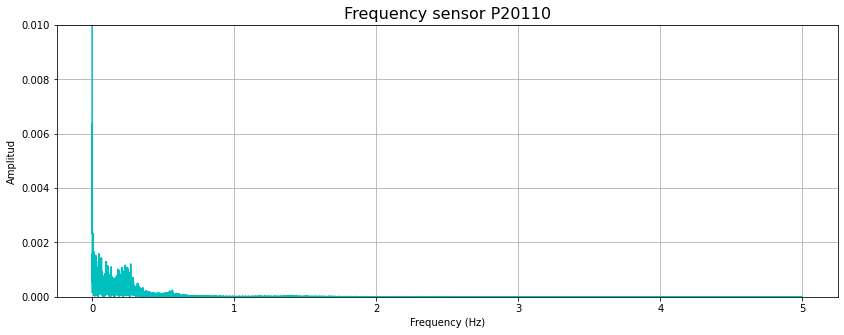

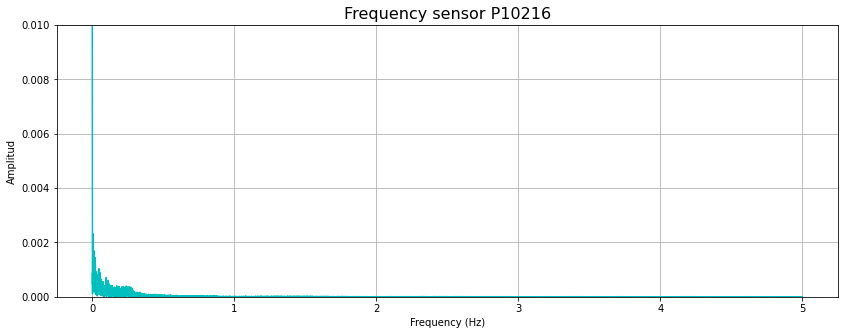

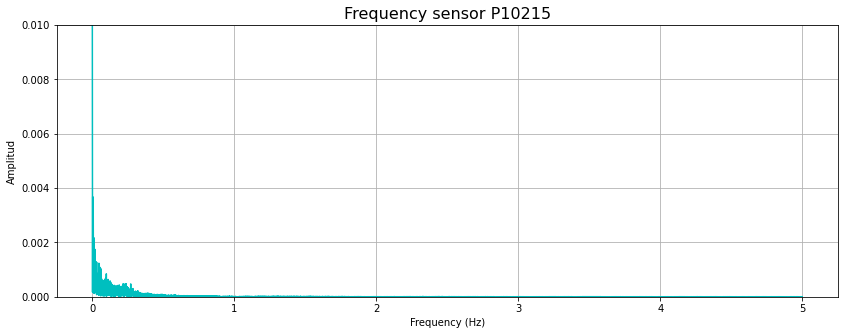

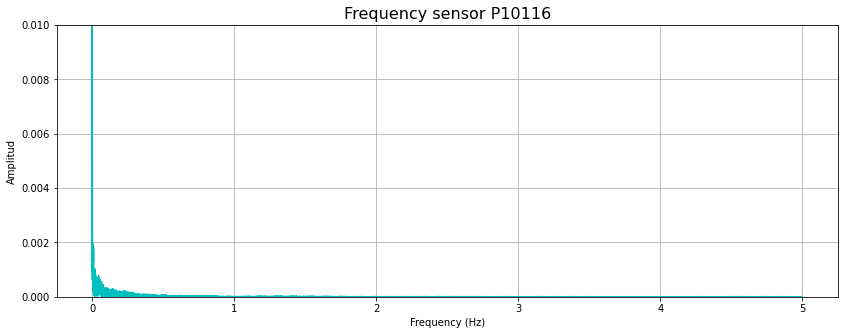

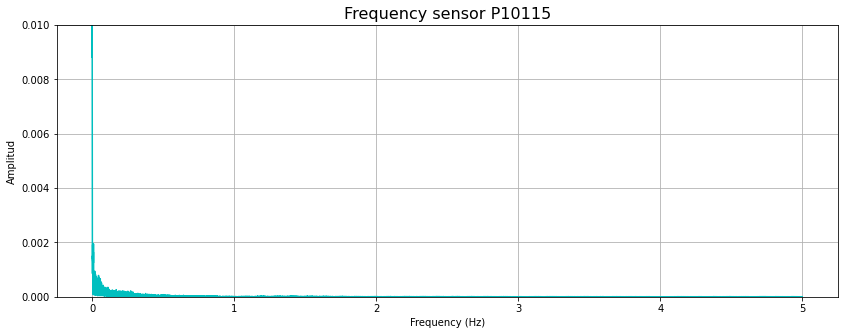

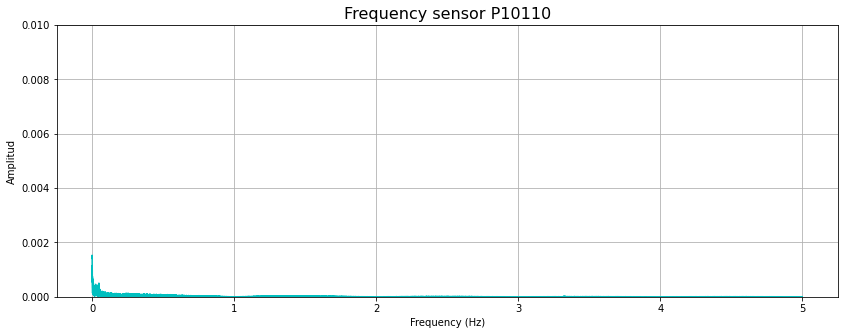

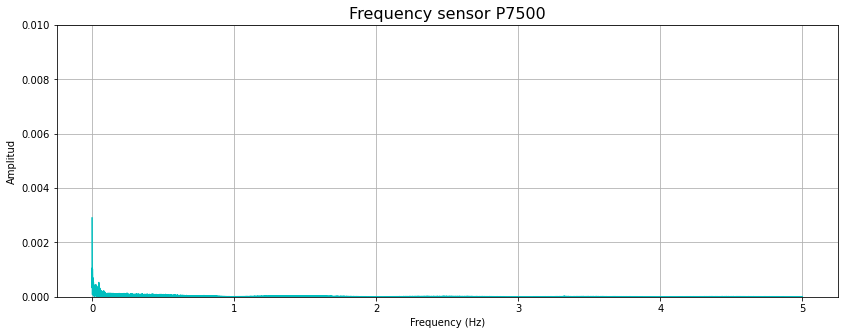

In [4]:
FFT_chart(pd.DataFrame(df))

In [5]:
# https://www.youtube.com/watch?v=DUznmZvSQOU
# https://www.youtube.com/watch?v=0TH5SLghYPY
# https://www.youtube.com/watch?v=w-6O090Fp7w
# https://www.youtube.com/watch?v=j2L-ovtEMPA
# https://www.youtube.com/watch?v=-RY_0AviWe4
# https://www.youtube.com/watch?v=8hBeeZ1Pvsg
    

In [6]:
## Filtering noise

In [7]:
def filter_plot(df):  
    from scipy.signal import savgol_filter
    columns = df.columns
    for column in columns:
        if column != df.columns[0]:
            x=df[str(column)]
            x=x.to_numpy()
            t=df[df.columns[0]]
            t=t.to_numpy()
            N = np.int(np.prod(t.shape))
            Fs = 1/(t[1]-t[0])
            T = 1/Fs
            t =  pd.to_datetime(df[df.columns[0]]/1000, unit='s')
            w = savgol_filter(x, 301, 2)
            plt.figure(figsize=(14,4))
            plt.plot(t, w, 'b',color='red')
            plt.title('Filtered plot ' + str(column),size=16)
            plt.xlabel('time')
            plt.ylabel('Value')
            plt.grid()


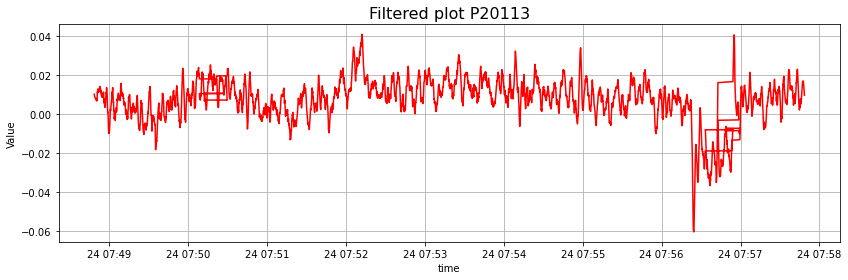

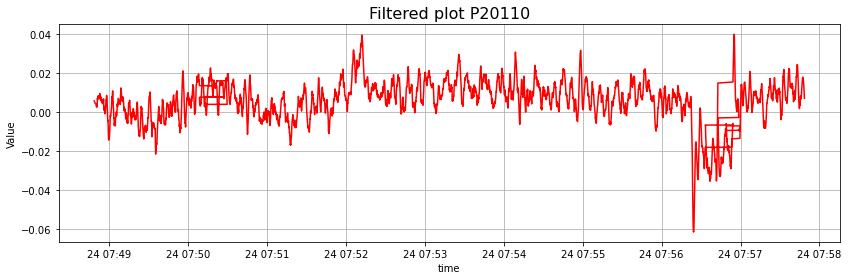

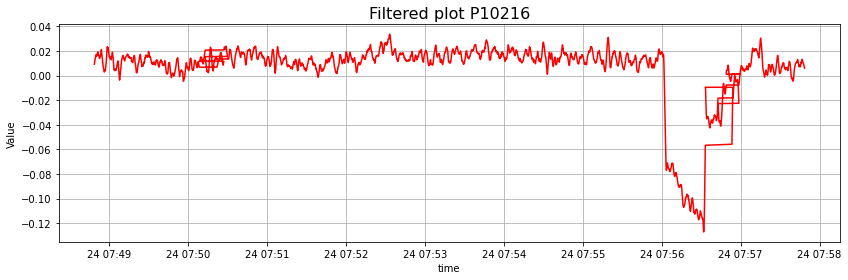

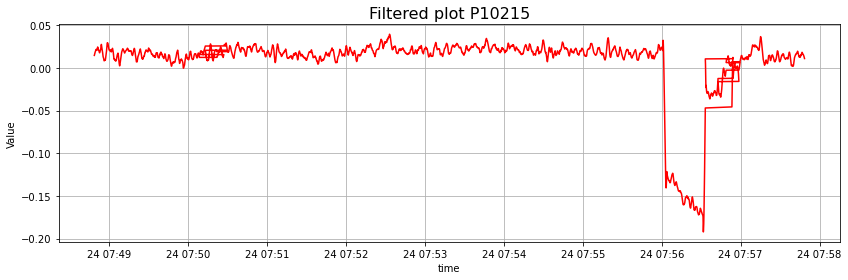

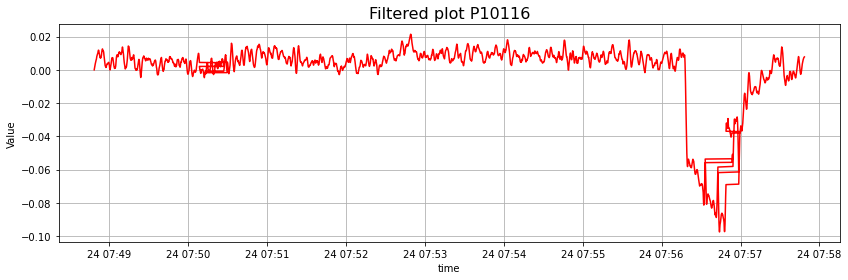

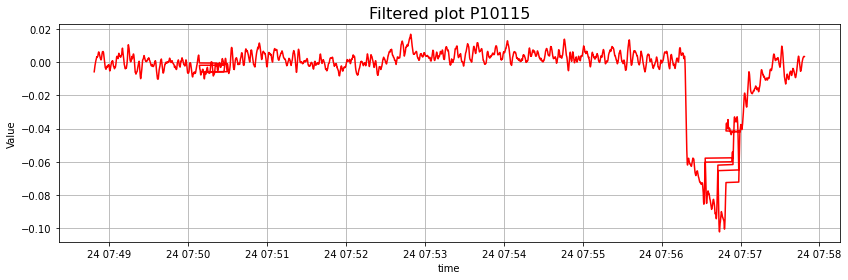

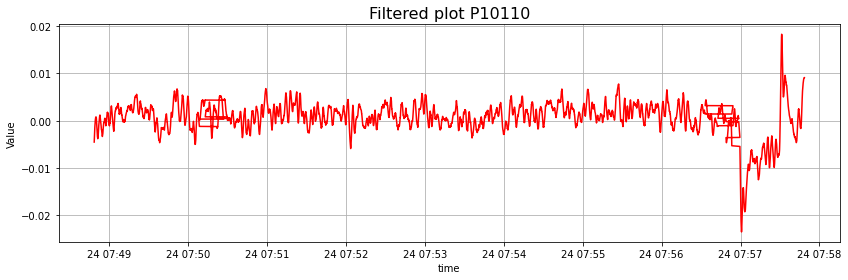

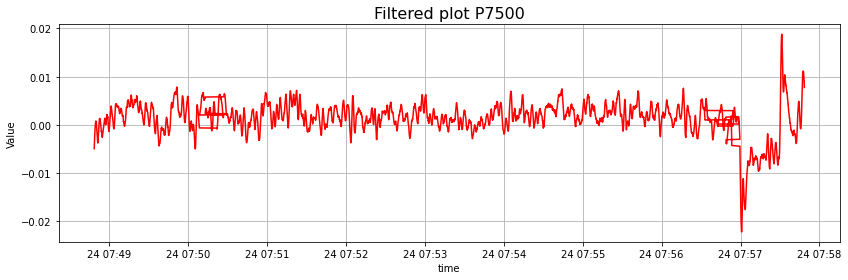

In [8]:
filter_plot(pd.DataFrame(df))

In [9]:
# Spectrogram

In [10]:
def spectrogram_plot(df):  
    from scipy.signal import savgol_filter
    columns = df.columns
    for column in columns:
        if column != df.columns[0]:
            x=df[str(column)]
            x=x.to_numpy()
            t=df[df.columns[0]]
            t=t.to_numpy()
            N = np.int(np.prod(t.shape))
            Fs = 1/(t[1]-t[0])
            T = 1/Fs
            t =  pd.to_datetime(df[df.columns[0]]/1000, unit='s')

            plt.figure(figsize=(14,4))
            f, t, Sxx = signal.spectrogram(x.T, Fs)
            plt.pcolormesh(t, f, Sxx, shading='gouraud')
            plt.ylim( (0, 0.0005) )
            plt.title('Spektrography ' + str(column),size=16)
            plt.xlabel('time')
            plt.ylabel('frequancy')
            plt.grid()

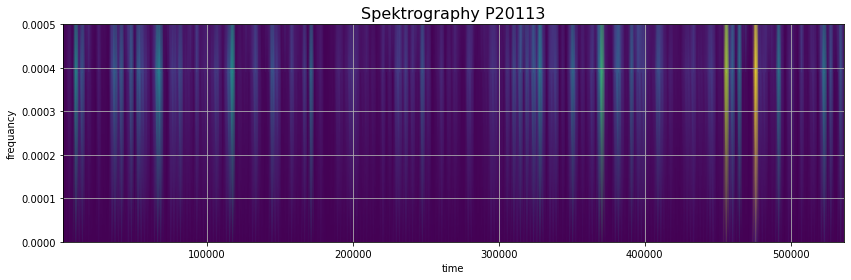

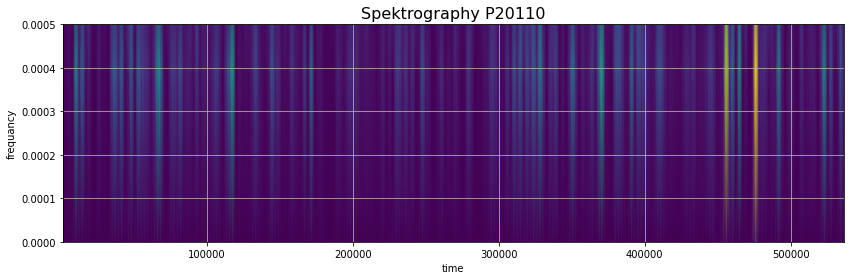

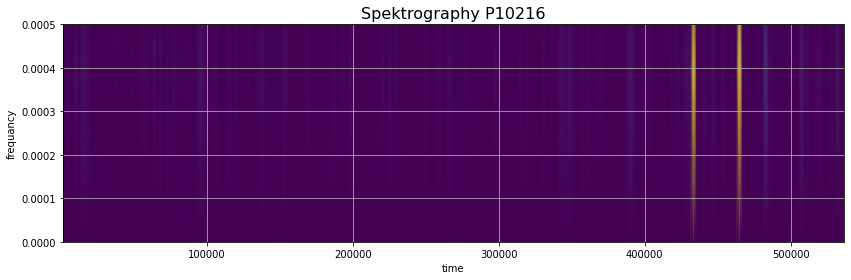

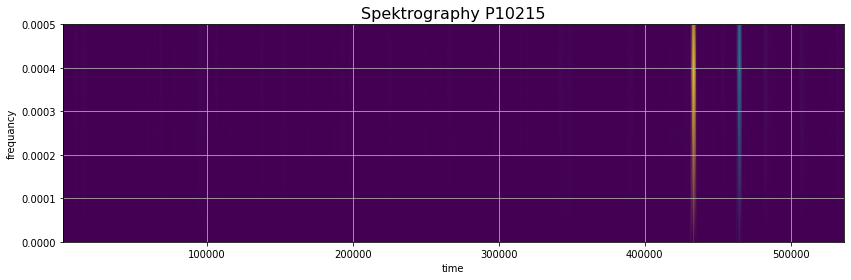

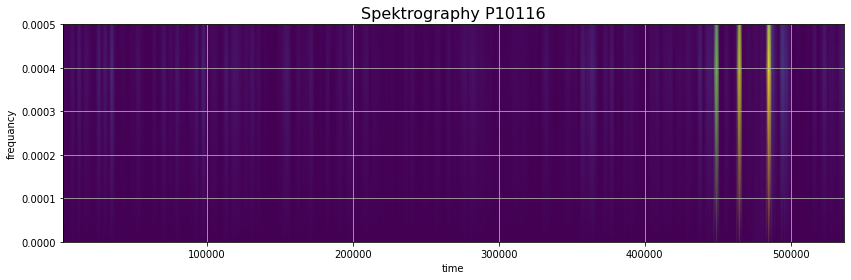

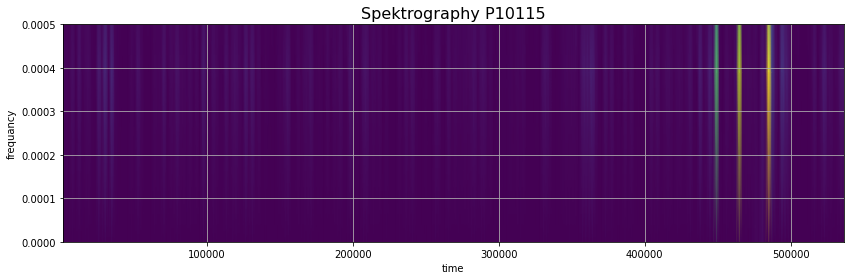

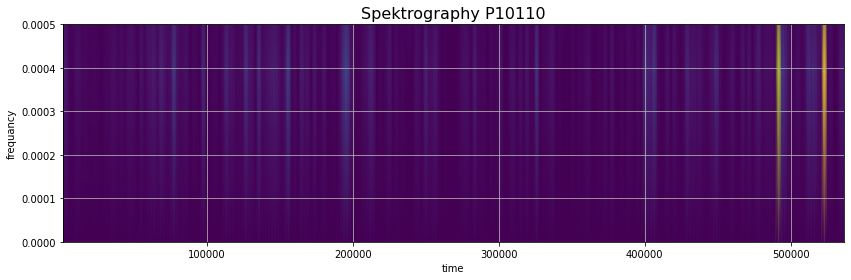

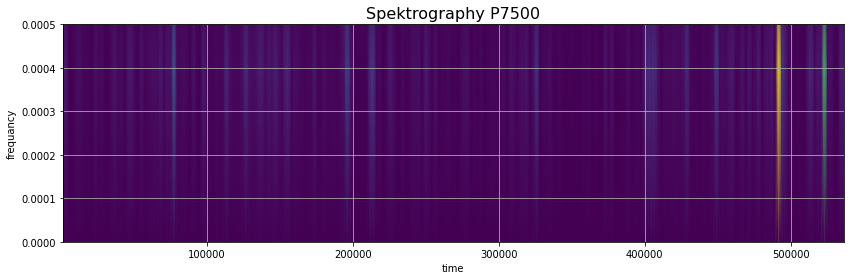

In [11]:
spectrogram_plot(pd.DataFrame(df))

In [12]:
def anomaly_detection_dynamic_plot(df):
#   https://medium.com/@krzysztofdrelczuk/time-series-anomaly-detection-with-python-example-a92ef262f09a
    import matplotlib.pyplot as plt
    import pandas as pd
    columns = df.columns
    for column in columns:
        if column != df.columns[0]:
            data = df[str(column)]
            data_column = data
            N = len(data)
            time = pd.to_datetime(df[df.columns[0]]/1000, unit='s')
#             np.arange(0,N)
            # (len(data),len(time))
            data_column = data_column.to_numpy() 
            window_percentage = 10
            k = int(len(data) * (window_percentage/100))
            std_div_koef = 3                            
            get_bands = lambda data : (np.mean(data) + std_div_koef * np.std(data),np.mean(data) - std_div_koef * np.std(data)) # 3 std devs

            # why there are if statements in providing indexes to range selector. It is there to handle boundary cases and avoid negative indexes and greater than size of whole data list
            bands = [get_bands(data_column[range(
                (0 if i-k < 0 else i-k),
                (i+k if i+k < N else N)
              )]) for i in range(0,N)]
            upper, lower = zip(*bands)

            # compute local outliers
            anomalies = (data_column > upper) | (data_column < lower)

            # plotting...
            plt.figure(figsize=(14,4))
            plt.title(f'Anomaly detection, column={column}, window_percentage={window_percentage}, std_div_koef={std_div_koef} ',size=16)

            plt.plot(time,data,'k',label='Data')
            plt.plot(time,upper,'r-',label='Bands',alpha=0.7) 
            plt.plot(time,lower,'r-',alpha=0.7)

            plt.plot(time[anomalies],data_column[anomalies],'ro',label='Anomalies')
            plt.fill_between(time, upper, lower,facecolor='red',alpha=0.1)
            plt.legend()

            #  plt.show()

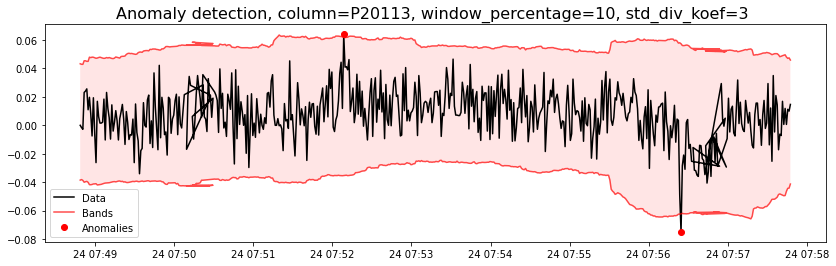

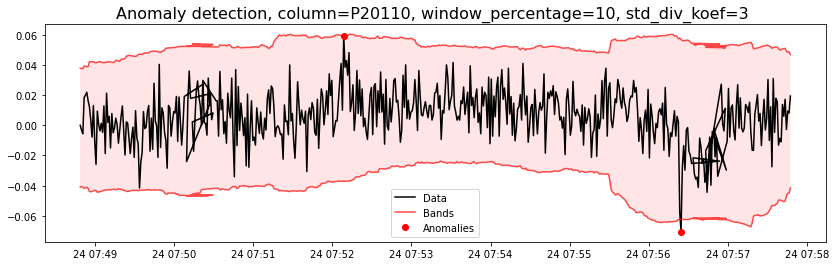

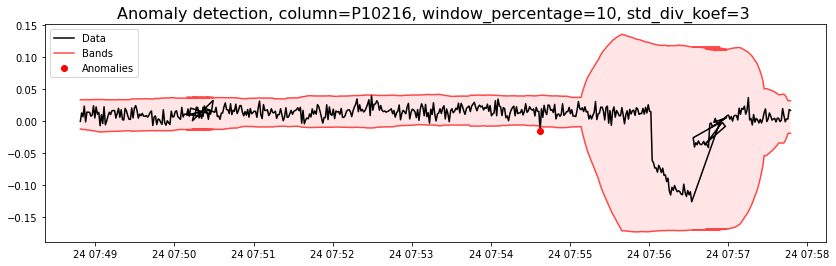

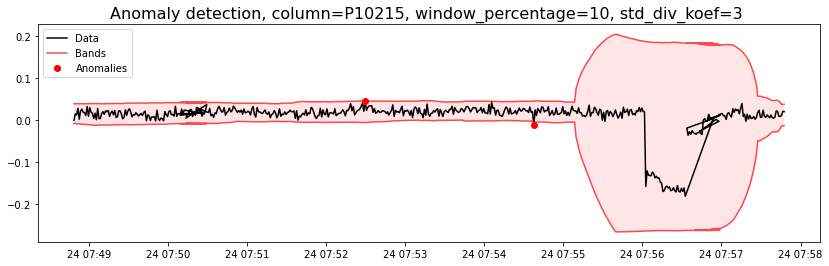

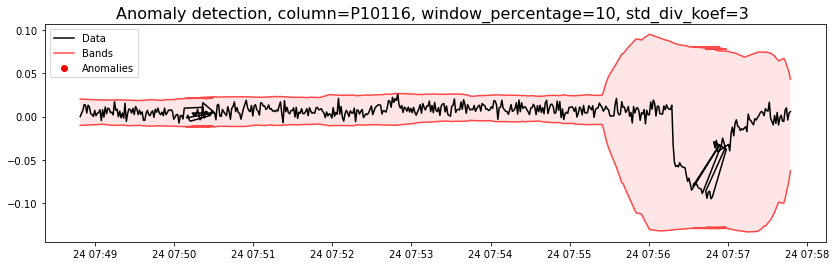

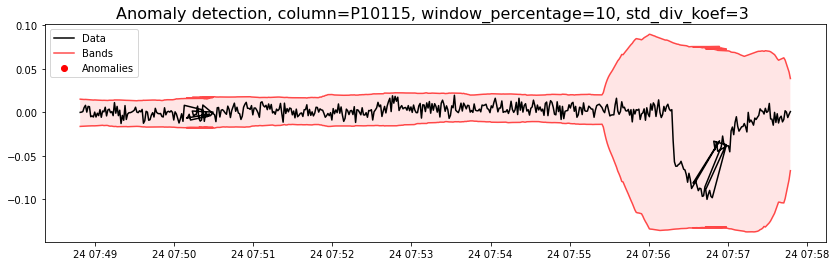

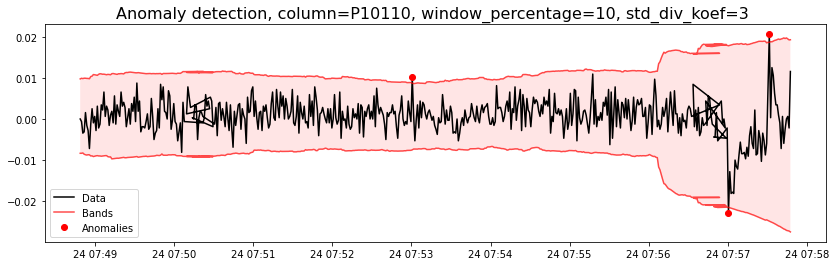

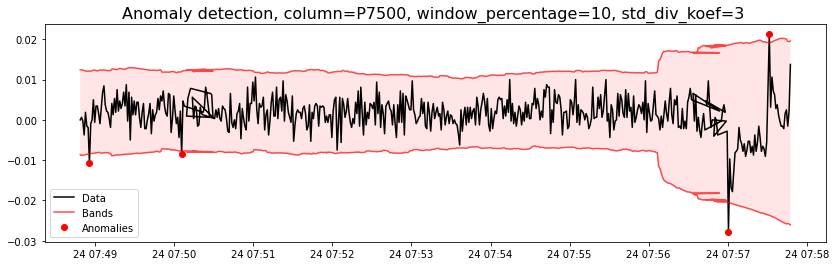

In [13]:
anomaly_detection_dynamic_plot(pd.DataFrame(df[::speed]))

# Autocorelation plot

In [14]:
def autocorelation_plot(df):  
    import pandas as pd
    import numpy as np
    from pandas.plotting import autocorrelation_plot
    from pandas import read_csv
    from matplotlib import pyplot
    columns = df.columns
    for column in columns:
        if column != df.columns[0]:
            dfx = pd.DataFrame(df[str(column)])
            plt.figure(figsize=(20, 6))
            autocorrelation_plot(dfx) # [100:200]            

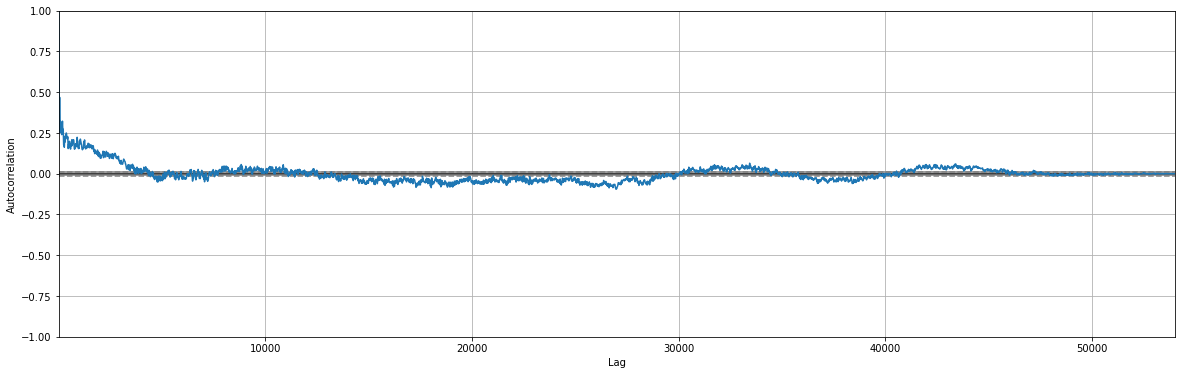

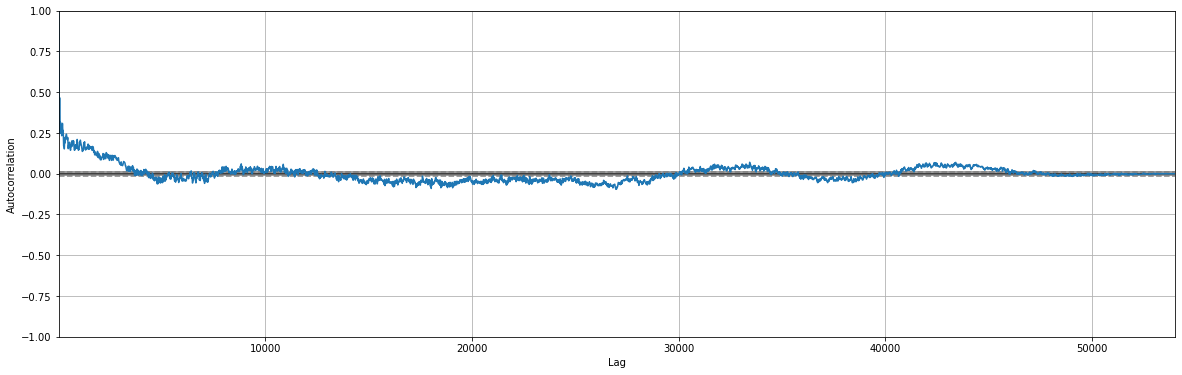

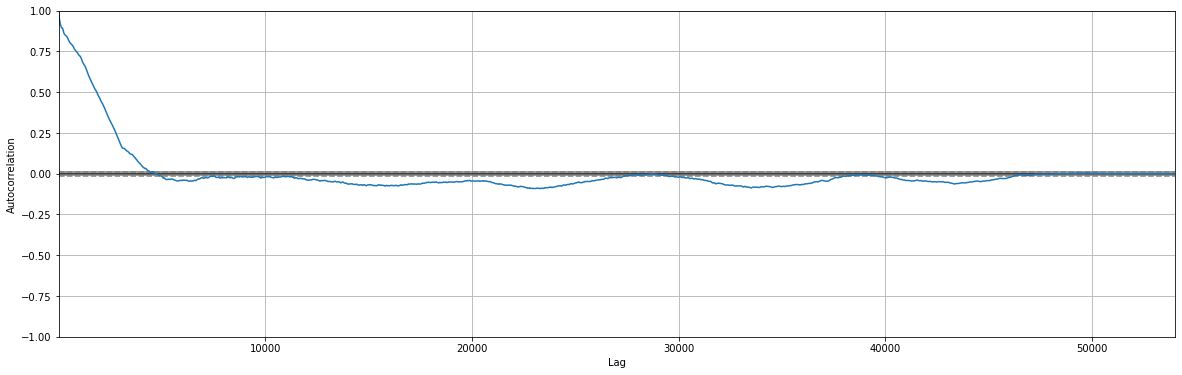

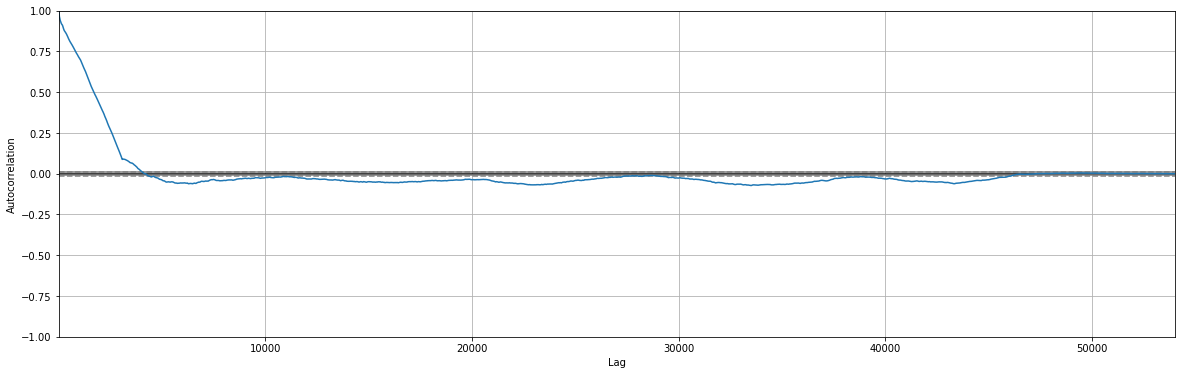

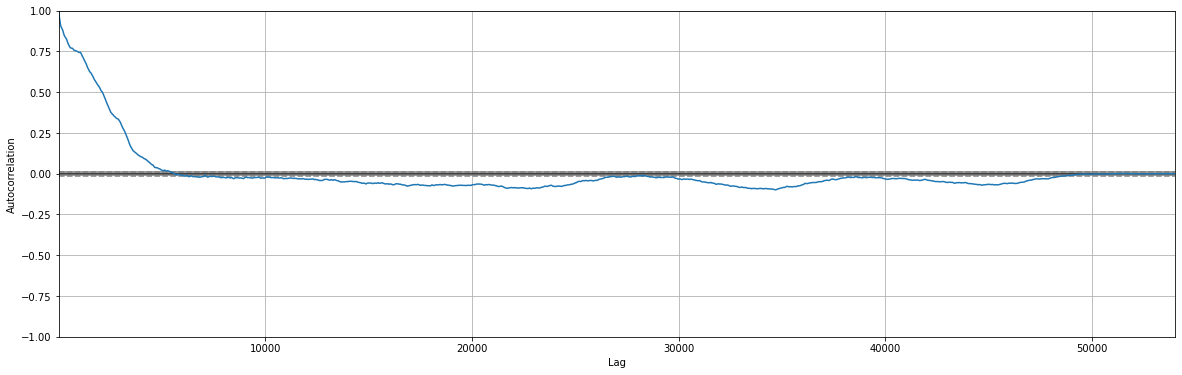

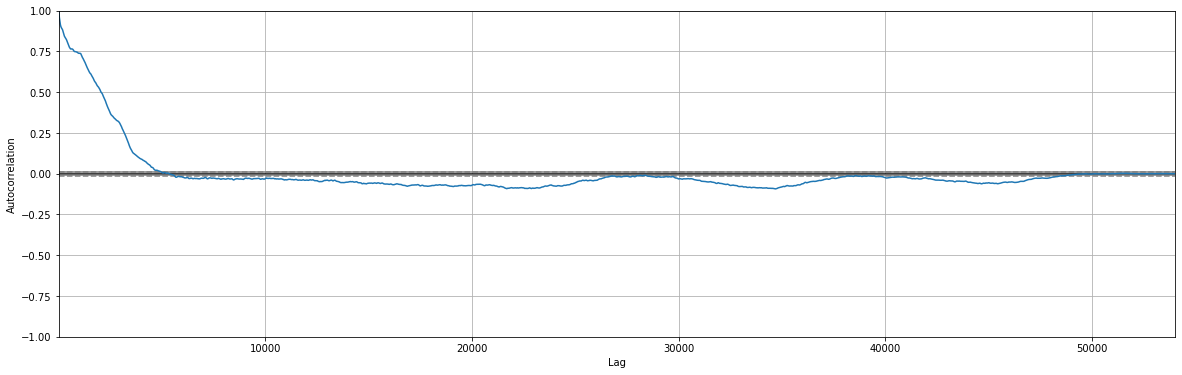

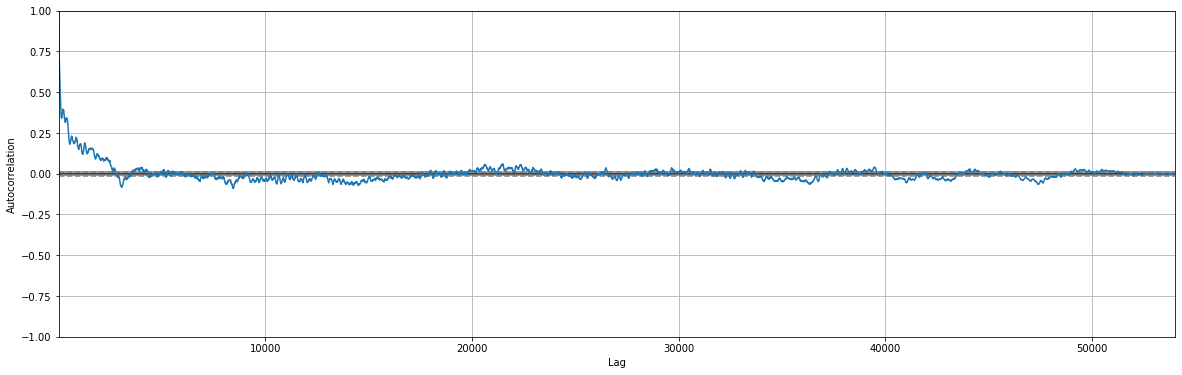

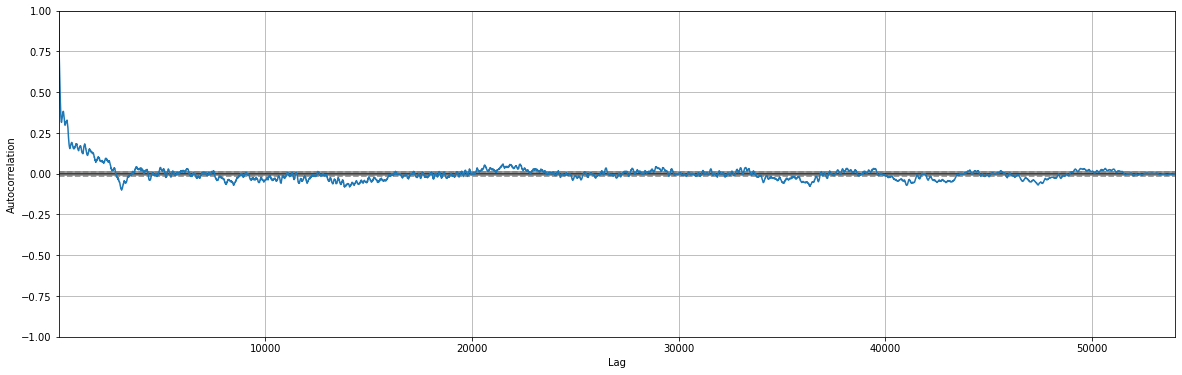

In [15]:
autocorelation_plot(pd.DataFrame(df))

In [16]:
def autocorelation_plot_partial(df):  
    import pandas as pd
    import numpy as np
    from pandas.plotting import autocorrelation_plot
    from matplotlib import pyplot
    from statsmodels.graphics.tsaplots import plot_pacf
    from matplotlib import pyplot as plt
    import statsmodels.api as sm
    columns = df.columns
    for column in columns:
        if column != df.columns[0]:
            x = pd.DataFrame(df[str(column)])          
            fig, ax = plt.subplots(figsize=(20,6))
            plot_pacf(x, lags=100, ax=ax)
            pyplot.show()
#  https://www.youtube.com/watch?v=Icl9_46_RZY

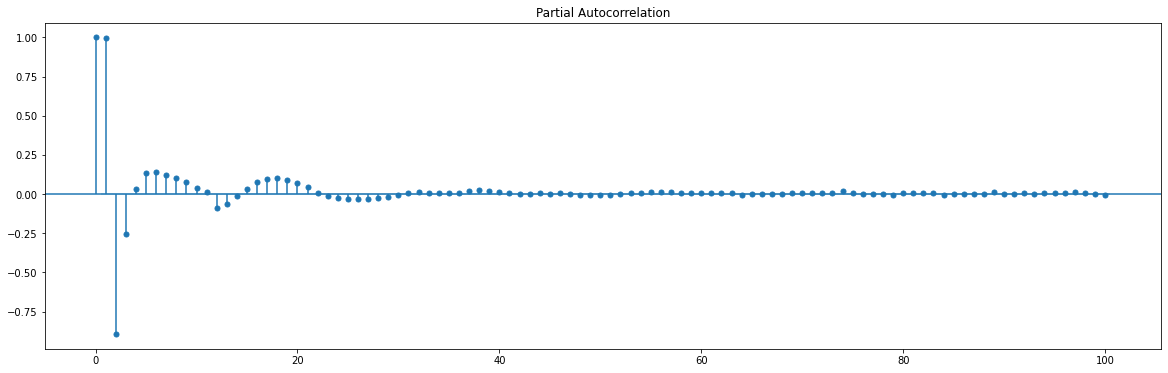

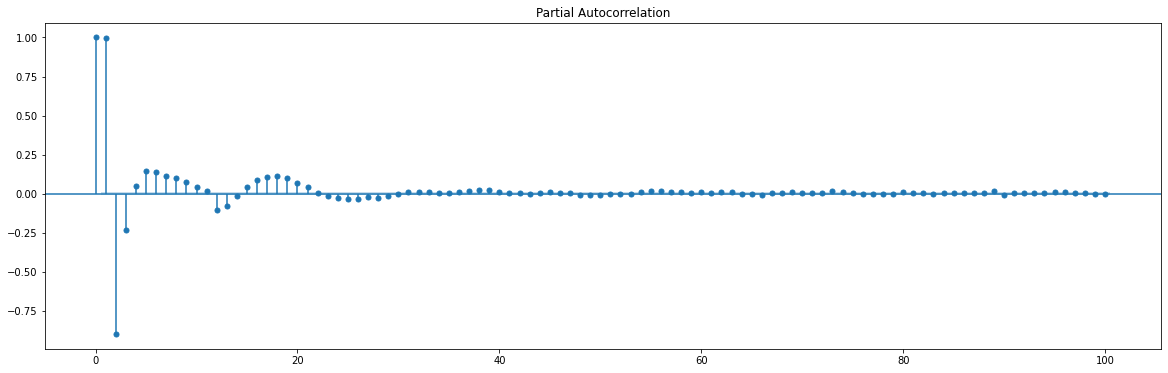

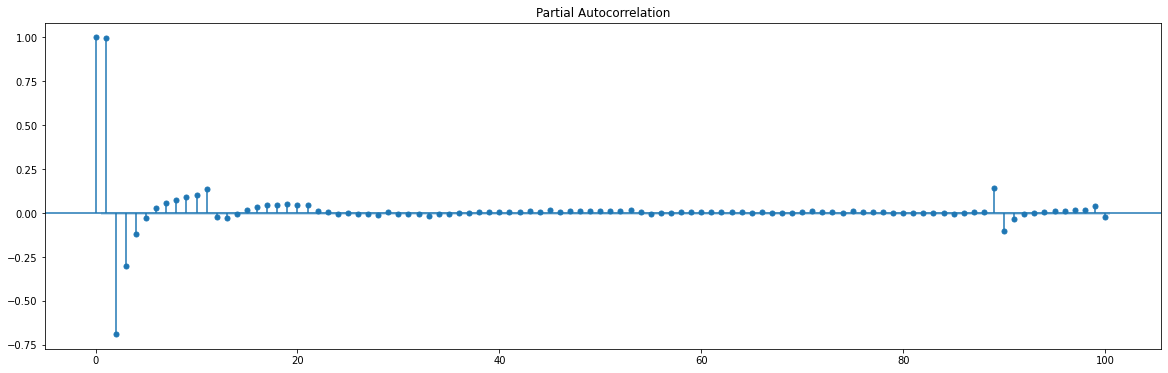

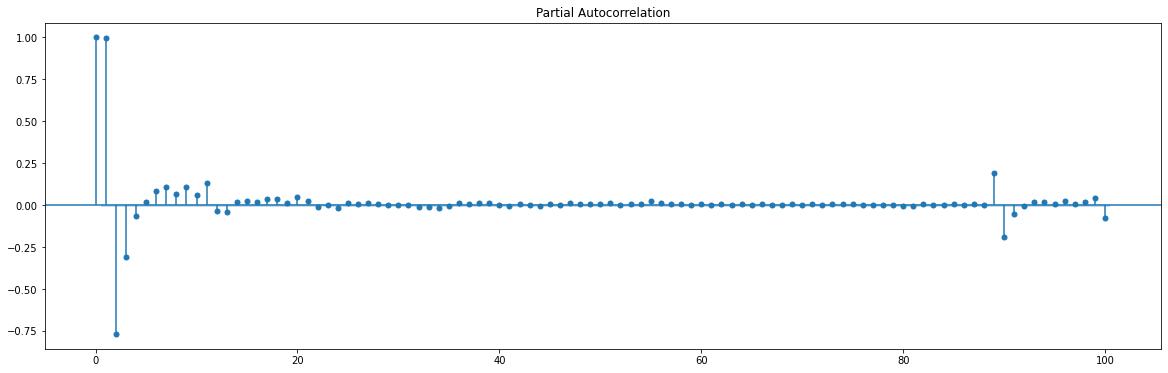

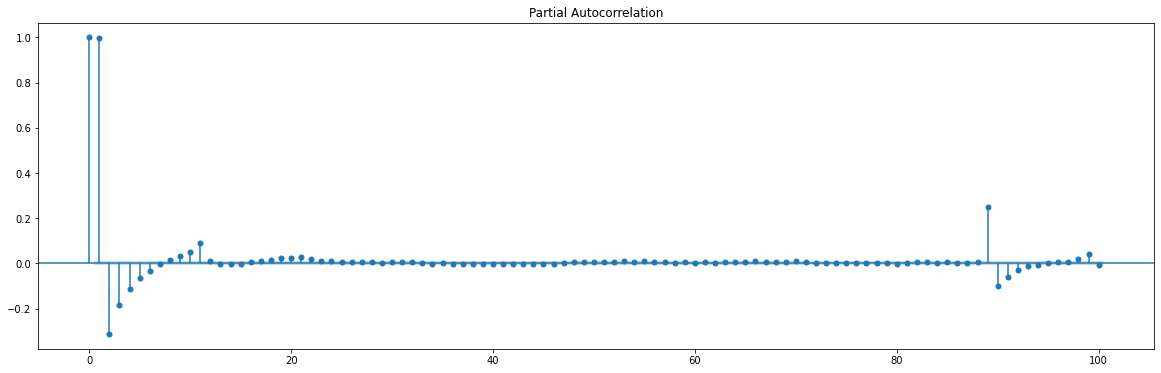

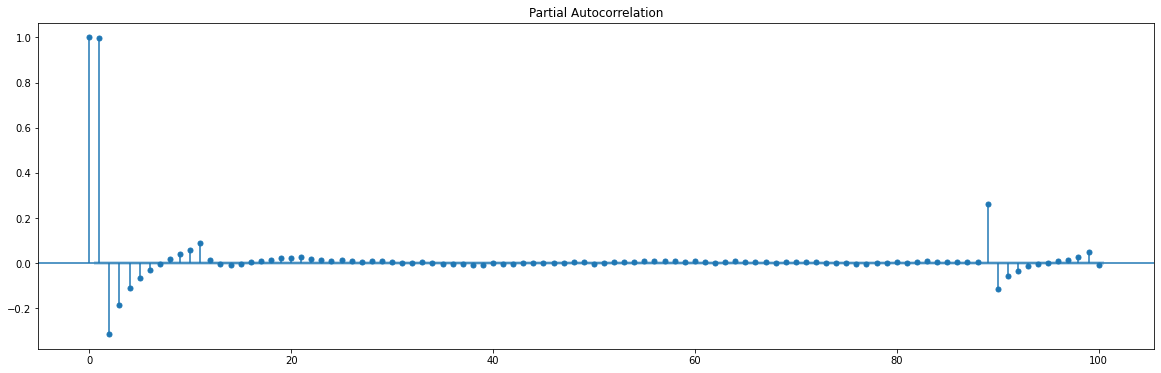

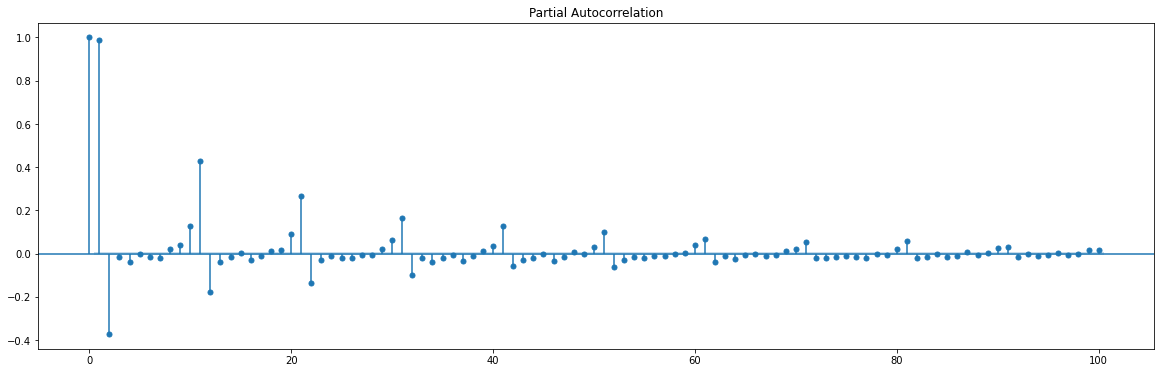

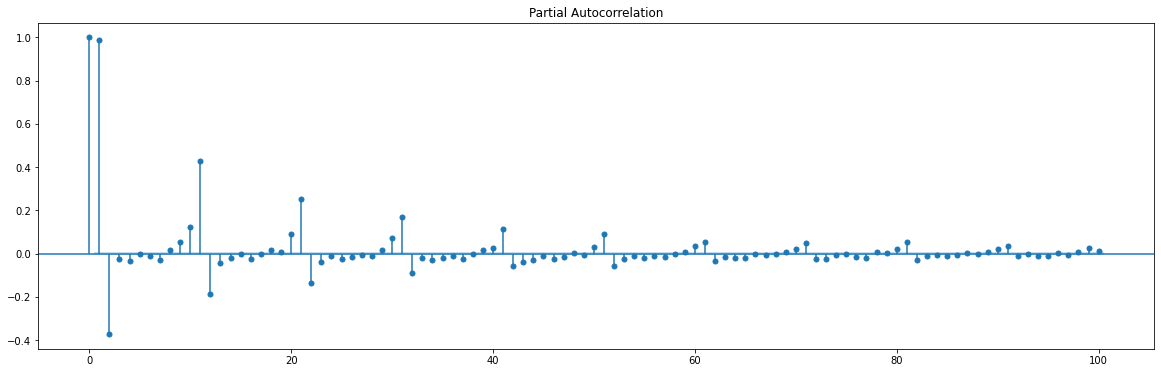

In [17]:
autocorelation_plot_partial(pd.DataFrame(df))

# Fourier_extrapolation with prediction plot

In [18]:
    from numpy import fft as npfft
    import pylab as pl

In [19]:
def fourierExtrapolation(x, n_harmonics, n_predict):
    n = x.size
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)  # find linear trend in x
    x_notrend = x - p[0] * t  # detrended x
    x_freqdom = npfft.fft(x_notrend)  # detrended x in frequency domain
    f = npfft.fftfreq(n)  # frequencies
    indexes = range(n)
    # sort indexes by frequency, lower -> higher
    sorted(indexes, key=lambda i: np.absolute(f[i]))
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harmonics * 2]:
        ampli = np.absolute(x_freqdom[i]) / n  # amplitude
        phase = np.angle(x_freqdom[i])  # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

In [20]:
def fourier_extrapolation_start(df):
    xpd = df
    columns = df.columns
    for column in columns:
        if column != df.columns[0]:
            x = xpd[str(column)]
            extrapolation = fourierExtrapolation(x, n_harmonics=int(len(df)/10), n_predict=int(len(df)/10))
            pl.figure(figsize=(25, 8))
            plt.title(f'fourier_extrapolation, column={column}', size=16)
            pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label='extrapolation')
            pl.plot(np.arange(0, x.size), x, 'b', label='x', linewidth=1)
            plt.legend()
           # plt.show()

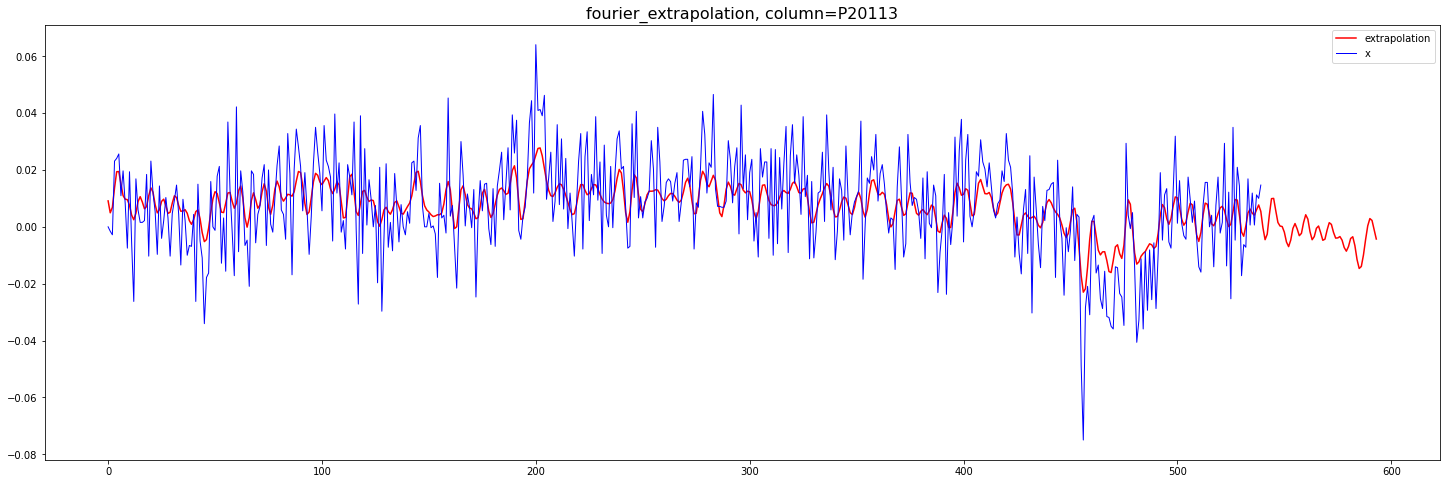

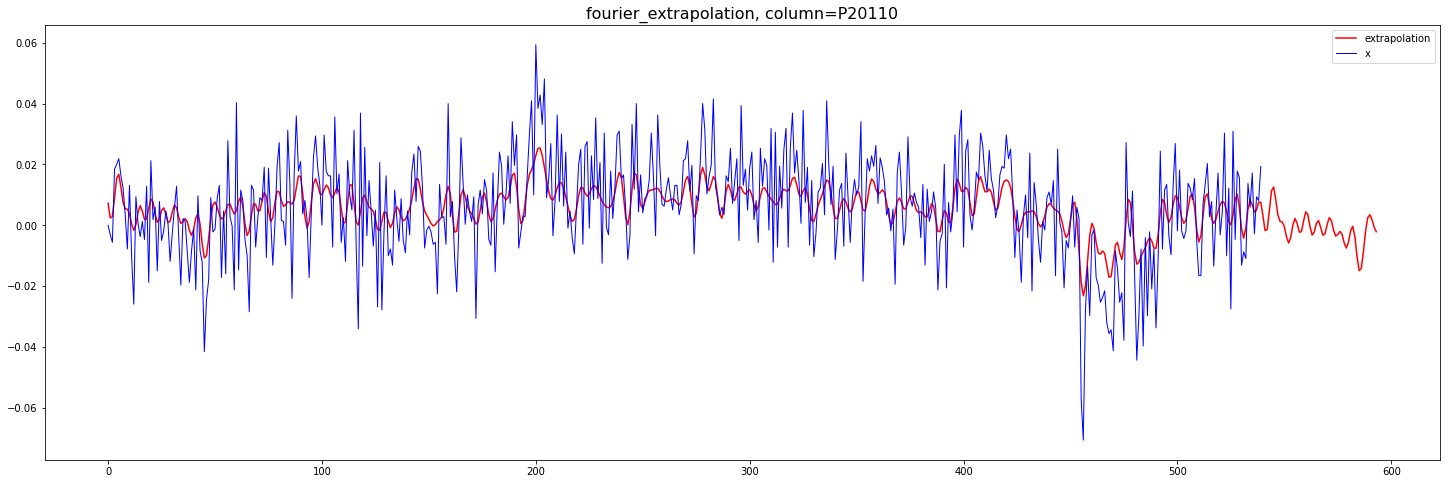

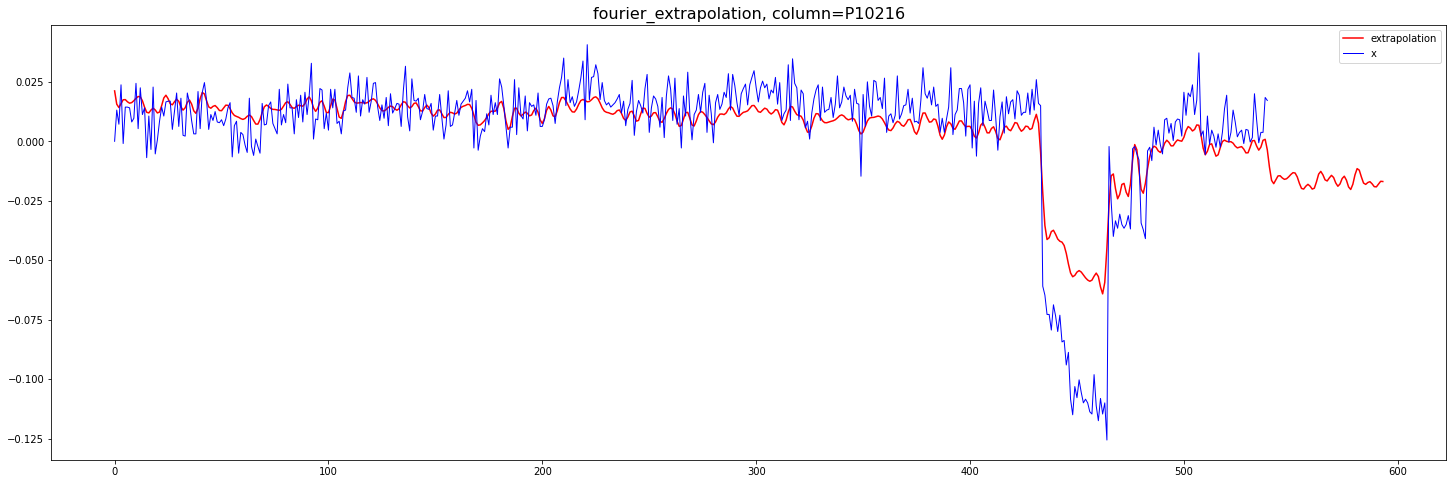

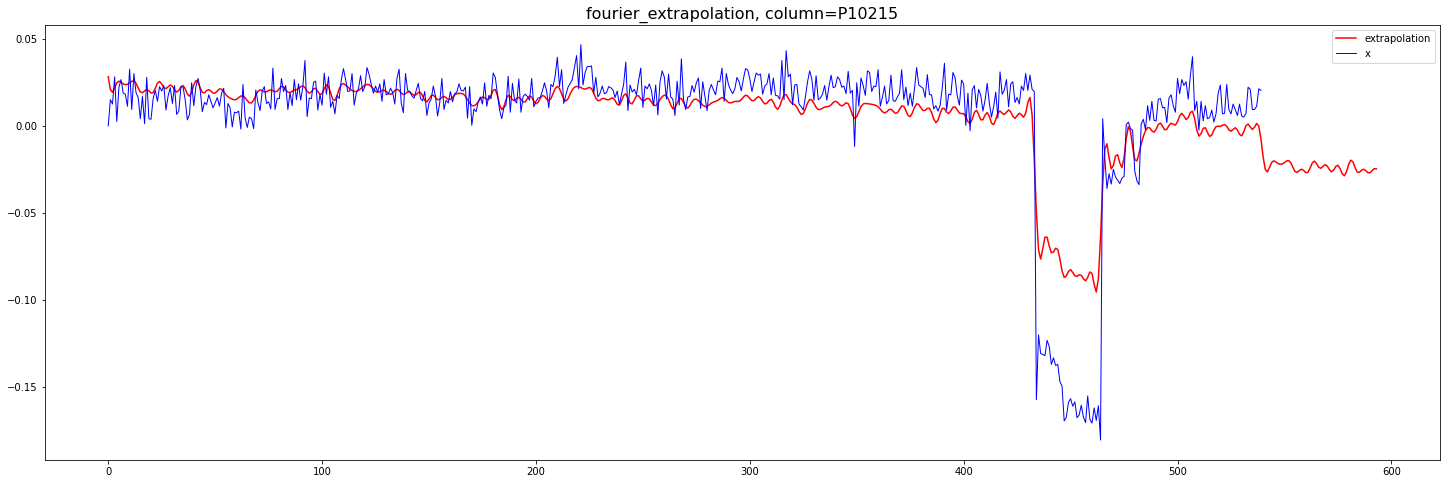

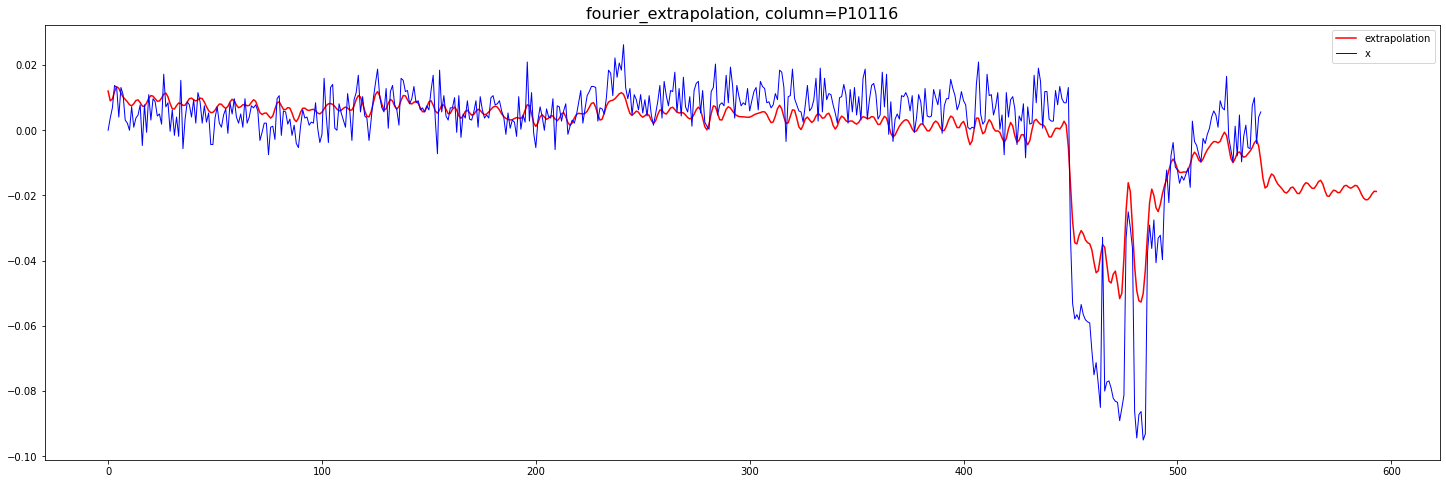

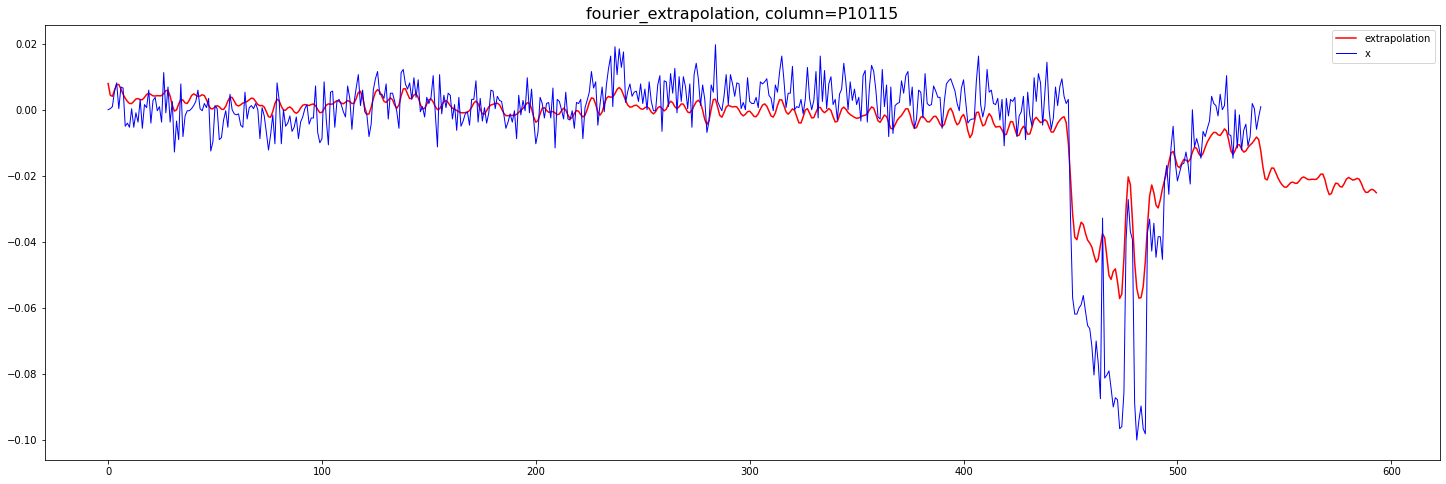

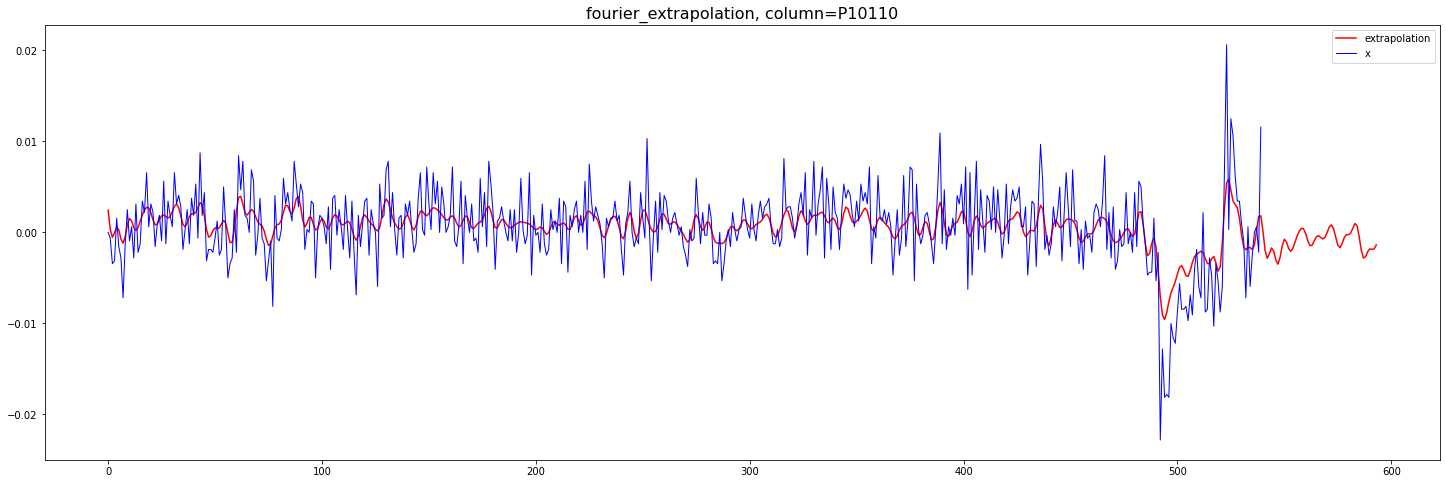

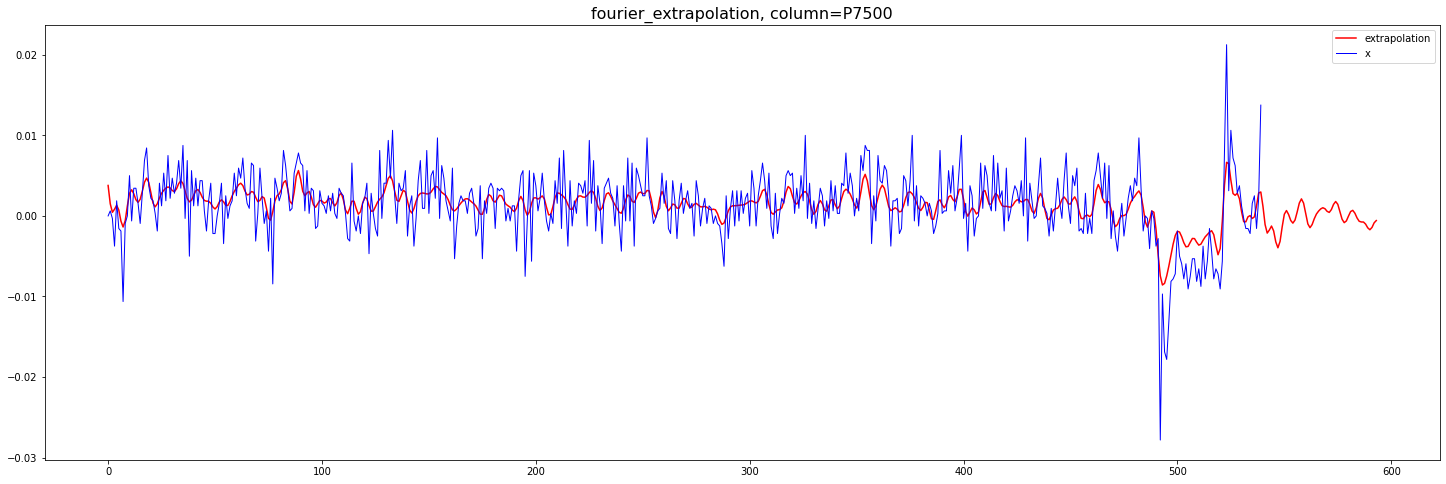

In [21]:
fourier_extrapolation_start(pd.DataFrame(df[::speed]))